In [8]:
import numpy as np
from keras.layers import Input, LSTM, Dropout, Reshape, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mse
import matplotlib.pyplot as plt

In [51]:
n = 3000
A = np.zeros(n)
A[0]=2; A[1]=5; A[2]=3
B = np.zeros(n)
B[0]=4; B[1]=0; B[2]=7

for i in range(3,n):
    A[i] = (3*A[i-1] + 1*A[i-2] + 4*A[i-3] + 1*B[i-1] + 5*B[i-2] + 9*B[i-3])%10
    B[i] = (2*A[i-1] + 7*A[i-2] + 1*A[i-3] + 8*B[i-1] + 2*B[i-2] + 8*B[i-3])%10

X, y = [], []
for i in range(n-3):
    X.append( [  [A[i],B[i]],  [A[i+1],B[i+1]],  [A[i+2],B[i+2]]  ] )	
    #X.append( [A[i:i+3], B[i:i+3]] )
    y.append( [A[i+3], B[i+3]] )
X, y = np.array(X)/10, np.array(y)/10

print(X.shape, y.shape)

(2997, 3, 2) (2997, 2)


In [52]:
z = list(zip(X, y))
np.random.shuffle(z)
X, y = zip(*z)
X, y = np.array(X), np.array(y)

xTrain, yTrain = X[:int(0.8*n)], y[:int(0.8*n)]
xVal, yVal = X[int(0.8*n):], y[int(0.8*n):]
print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape)

(2400, 3, 2) (2400, 2) (597, 3, 2) (597, 2)


In [58]:
inputs = Input(shape=(3,2))
x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)
x = Reshape((192,))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(2)(x)

model = Model(inputs, x)
model.compile(optimizer=Adam(lr=0.0001), loss=mse)
model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3, 2)              0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 3, 128)            67072     
_________________________________________________________________
dropout_83 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 3, 64)             49408     
_________________________________________________________________
dropout_84 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 192)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               247

In [ ]:
history = model.fit(xTrain, yTrain, epochs=2000, validation_data=(xVal, yVal))

Train on 2400 samples, validate on 597 samples
Epoch 1/2000
2400/2400 [==============================] - 2s 980us/step - loss: 0.2379 - val_loss: 0.1492
Epoch 2/2000
2400/2400 [==============================] - 1s 286us/step - loss: 0.1077 - val_loss: 0.0896
Epoch 3/2000
2400/2400 [==============================] - 1s 284us/step - loss: 0.0969 - val_loss: 0.0879
Epoch 4/2000
2400/2400 [==============================] - 1s 291us/step - loss: 0.0961 - val_loss: 0.0874
Epoch 5/2000
2400/2400 [==============================] - 1s 284us/step - loss: 0.0947 - val_loss: 0.0878
Epoch 6/2000
2400/2400 [==============================] - 1s 290us/step - loss: 0.0943 - val_loss: 0.0862
Epoch 7/2000
2400/2400 [==============================] - 1s 304us/step - loss: 0.0935 - val_loss: 0.0858
Epoch 8/2000
2400/2400 [==============================] - 1s 315us/step - loss: 0.0920 - val_loss: 0.0854
Epoch 9/2000
2400/2400 [==============================] - 1s 354us/step - loss: 0.0919 - val_loss: 0.0852

2400/2400 [==============================] - 1s 368us/step - loss: 0.0852 - val_loss: 0.0849
Epoch 78/2000
2400/2400 [==============================] - 1s 351us/step - loss: 0.0858 - val_loss: 0.0849
Epoch 79/2000
2400/2400 [==============================] - 1s 356us/step - loss: 0.0856 - val_loss: 0.0851
Epoch 80/2000
2400/2400 [==============================] - 1s 354us/step - loss: 0.0849 - val_loss: 0.0853
Epoch 81/2000
2400/2400 [==============================] - 1s 337us/step - loss: 0.0844 - val_loss: 0.0850
Epoch 82/2000
2400/2400 [==============================] - 1s 340us/step - loss: 0.0850 - val_loss: 0.0852
Epoch 83/2000
2400/2400 [==============================] - 1s 341us/step - loss: 0.0858 - val_loss: 0.0854
Epoch 84/2000
2400/2400 [==============================] - 1s 340us/step - loss: 0.0851 - val_loss: 0.0851
Epoch 85/2000
2400/2400 [==============================] - 1s 340us/step - loss: 0.0848 - val_loss: 0.0849
Epoch 86/2000
2400/2400 [==========================

2400/2400 [==============================] - 1s 322us/step - loss: 0.0840 - val_loss: 0.0850
Epoch 154/2000
2400/2400 [==============================] - 1s 319us/step - loss: 0.0836 - val_loss: 0.0849
Epoch 155/2000
2400/2400 [==============================] - 1s 321us/step - loss: 0.0838 - val_loss: 0.0850
Epoch 156/2000
2400/2400 [==============================] - 1s 322us/step - loss: 0.0845 - val_loss: 0.0849
Epoch 157/2000
2400/2400 [==============================] - 1s 325us/step - loss: 0.0845 - val_loss: 0.0849
Epoch 158/2000
2400/2400 [==============================] - 1s 325us/step - loss: 0.0842 - val_loss: 0.0849
Epoch 159/2000
2400/2400 [==============================] - 1s 321us/step - loss: 0.0837 - val_loss: 0.0849
Epoch 160/2000
2400/2400 [==============================] - 1s 354us/step - loss: 0.0841 - val_loss: 0.0849
Epoch 161/2000
2400/2400 [==============================] - 1s 362us/step - loss: 0.0836 - val_loss: 0.0849
Epoch 162/2000
2400/2400 [=================

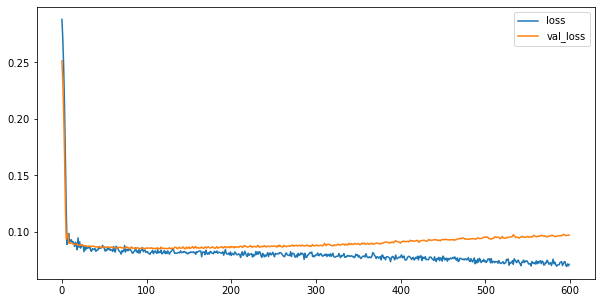

In [46]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.show()

In [35]:
pred = model.predict(X)
print(pred.shape)

(297, 2)


In [36]:
for i in range(len(pred)):
    print(pred[i], y[i])

[0.44340873 0.40322056] [0.5 0.2]
[0.4637456 0.4198687] [0.7 0.5]
[0.4565596  0.41247502] [0.5 0.9]
[0.44293278 0.39820063] [0.7 0.4]
[0.43022227 0.38962162] [0.1 0. ]
[0.45508373 0.41198727] [0.3 0.6]
[0.494646   0.44864437] [0.9 0.6]
[0.4565817 0.4136039] [0. 0.]
[0.4298454  0.38622606] [0.3 0.6]
[0.46600544 0.42574215] [0.7 0.2]
[0.5039315  0.45596933] [0.6 0.3]
[0.3681509  0.33215874] [0.4 0.1]
[0.41082895 0.371191  ] [0.3 0.4]
[0.48807645 0.44373208] [0.7 0. ]
[0.48101526 0.4339174 ] [0.3 0.2]
[0.3861127 0.3503212] [0. 0.]
[0.48870945 0.44578385] [0.3 0.4]
[0.49350917 0.4489687 ] [0.3 0.4]
[0.4819966  0.43417066] [0.7 0.8]
[0.429662  0.3858968] [0.1 0.6]
[0.49228615 0.446216  ] [0.4 0.9]
[0.4301541  0.38733345] [0.8 0.1]
[0.48455244 0.44080567] [0.1 0.2]
[0.45864224 0.4175174 ] [0.6 0.3]
[0.47184652 0.42983475] [0.1 0.2]
[0.49171227 0.44335413] [0.7 0.1]
[0.42613333 0.3832489 ] [0.9 0.2]
[0.47790807 0.43113858] [0.3 0.9]
[0.40308225 0.3655213 ] [0.3 0.6]
[0.47486877 0.43283206] [0